In [1]:
import numpy as np

grav_const = 6.67e-11
print(grav_const)
joe = 0
class Body():
    def __init__(self, name, y, mass):
        self.name = name
        self.y = y
        self.mass = mass
        
class Simulation(Body):
    def __init__(self, max_steps, ti, dt, sat_y, bodies):
        self.sat_y = sat_y
        self.bodies = bodies
        self.steps = max_steps
        self.t = ti
        self.dt = dt

    def run_sim(self):
        RK4(Sim1, np.vectorize(Sim1.grav_function), 4000, Sim1.dt)


def grav_function(sim, y):
    """Calculates the acceleration experienced by the object"""
    
    y_new = np.zeros(6)
    for body in sim.bodies:
        #print(joe)
        sep = body.y[:3] - y[:3]
        sep_mag = np.linalg.norm(sep)

        #print(sep_mag)
        accel = ((grav_const * body.mass) / (sep_mag ** 3)) * sep
        
        #print(np.linalg.norm(accel))
        #if np.linalg.norm(accel) > 100000:
        #    print(accel, sep, body.mass)
        #print(y)
        y_new[3:] += accel * sim.dt
        #print(y_new)
        y_new[:3] += (y[3:] + y_new[3:]) * sim.dt
        #print(y_new)
    return y_new
        
        
                    
def RK4(sim, f, t, dt):
    """Implementation of a 4th-order Runge Kutta method."""  
    m = sim.sat_y.shape[0]
    max_steps = int(t/dt)
    tlist = np.linspace(0, t, max_steps)
    y = np.zeros((m, max_steps), float)
    y[:, 0] = sim.sat_y
    #y[:, 0] = Sim1.sat_y
    for i in range(0,max_steps-1):
        k1 = f(sim, y[:, i])
        #print(k1)
        k2 = f(sim, y[:, i] + (0.5 * dt * k1))
        #print(k2)
        k3 = f(sim, y[:, i] + 0.5 * dt * k2)
        k4 = f(sim, y[:, i] + dt * k3)
        y[:, i + 1] = y[:, i] + (dt / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
        #print(y[:, i + 1])
    return(tlist, y)
joe = 0


Sat = Body("Satellite", np.array([22314050.238, -6.50E+04, -1.70E+04, -933.974765, -5000.940683, 498.5964516]), 2)

# 5.97e24

#Sat = Body("Satellite", np.array([-1.43e11, 1678245, 4.84E+10, -9083, -2.34, -28122]), 2)
Planet = Body("Planet", np.array([1,1,1,1,1,1]), 5.97e24)
#print(Sat.y)

Sim1 = Simulation(10, 0, 1, Sat.y, [Planet])

#grav_function(Sim1, Sat.y)
#Simulation.run_sim(Sim1)
grav_vectorized = np.vectorize(grav_function)
#print(Sim1.sat_y)
t_list, y = RK4(Sim1, grav_function, 100000, 10)
#print(y)

6.67e-11


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


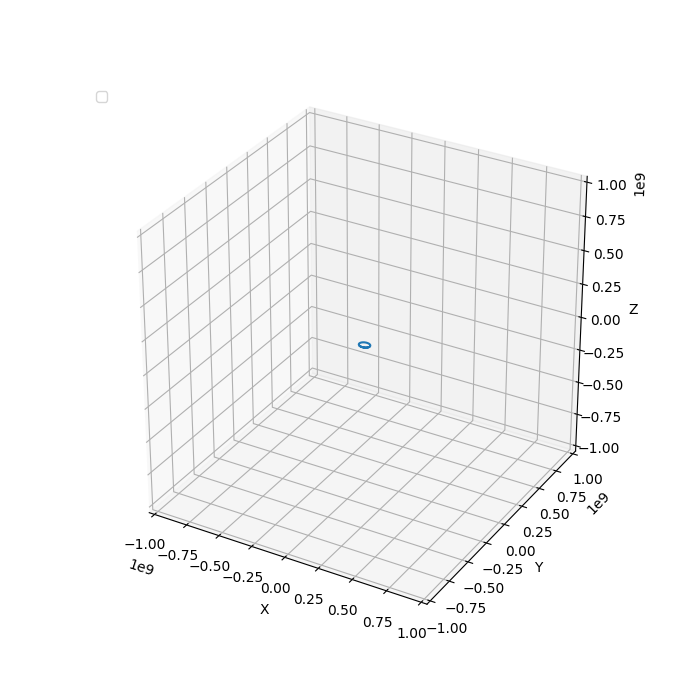

In [2]:
import matplotlib.pyplot as plt
%matplotlib widget
# Graphing section
fig = plt.figure(figsize = (7,7))

ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1,1,1])

graphcounter = 0

# This just names the orbital paths from the CSV
ax.plot3D(y[0], y[1], y[2])

leg = plt.legend(loc='upper left')

    
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

ax.set_xlabel('X')

ax.set_ylabel('Y')

ax.set_zlabel('Z')


x = 696340000 * np.outer(np.cos(u), np.sin(v))
y = 696340000 * np.outer(np.sin(u), np.sin(v))
z = 696340000 * np.outer(np.ones(np.size(u)), np.cos(v))

#ax.plot_surface(x, y, z, rstride=4, cstride=4, color='b')

# The area that the graph will show upon start
GraphAreaStart = 1000000000

ax.set_xlim3d(-1 * GraphAreaStart, GraphAreaStart)
ax.set_ylim3d(-1 * GraphAreaStart, GraphAreaStart)
ax.set_zlim3d(-1 * GraphAreaStart, GraphAreaStart)

plt.show()